In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
events = pd.read_csv('Data-Result-5.csv', sep=';')
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987776 entries, 0 to 987775
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   eventtimestamp     987776 non-null  object 
 1   dataid             987776 non-null  object 
 2   alertFlags         987776 non-null  int64  
 3   batteryLevel       987776 non-null  int64  
 4   signalStrength     987776 non-null  int64  
 5   temperature        987776 non-null  float64
 6   macaddress         987776 non-null  object 
 7   timestampgateway1  987776 non-null  object 
 8   gatewayid1         987776 non-null  object 
 9   messagetimestamp   987776 non-null  object 
 10  assetid            987776 non-null  int64  
 11  id                 987776 non-null  int64  
 12  macaddress2        987776 non-null  object 
 13  asssetid           987776 non-null  int64  
 14  arrivalTime        987776 non-null  object 
 15  DepartureTime      987776 non-null  object 
 16  To

In [3]:
numerical = ['signalStrength', 'temperature', 'assetid']
categorical = ['alertFlags', 'batteryLevel', 'macaddress', 'eventtimestamp', 'arrivalTime', 'DepartureTime']
events = events[numerical + categorical]
events.shape

(987776, 9)

C:\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


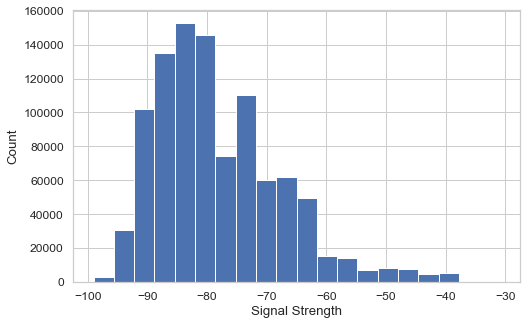

In [4]:
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    events['signalStrength'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Signal Strength', ylabel='Count');

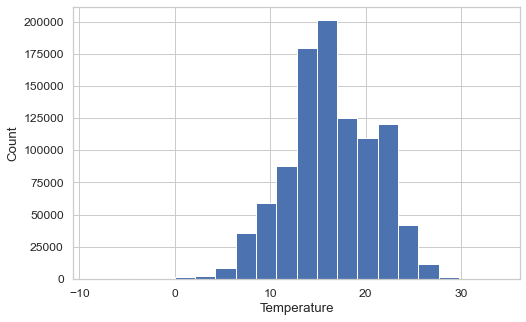

In [5]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    events['temperature'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha" : 1}
).set(xlabel='Temperature', ylabel='Count');

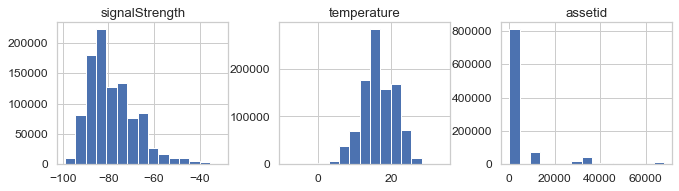

In [6]:
events[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4));

C:\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


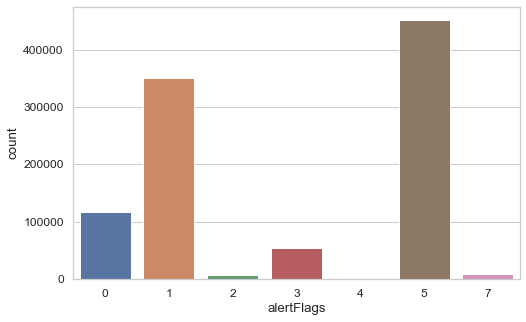

In [7]:
sns.countplot(events['alertFlags']);

C:\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='batteryLevel', ylabel='count'>

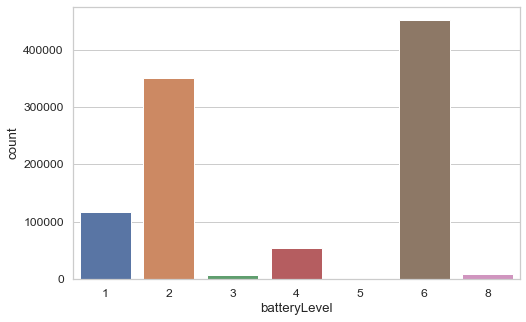

In [8]:
sns.countplot(events['batteryLevel'])

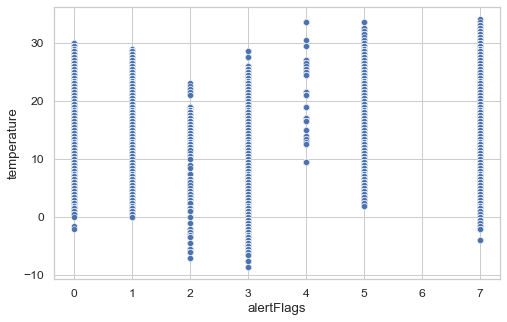

In [9]:
sns.scatterplot(x=events['alertFlags'], y=events['temperature']);

<AxesSubplot:xlabel='alertFlags', ylabel='signalStrength'>

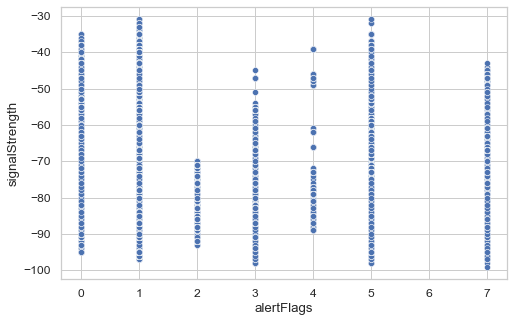

In [10]:
sns.scatterplot(x=events['alertFlags'], y=events['signalStrength'])

<AxesSubplot:xlabel='batteryLevel', ylabel='temperature'>

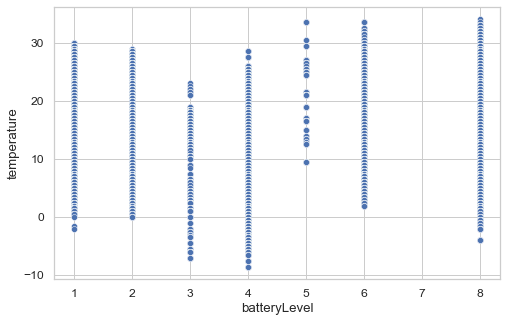

In [11]:
sns.scatterplot(x=events['batteryLevel'], y=events['temperature'])

<AxesSubplot:xlabel='temperature', ylabel='signalStrength'>

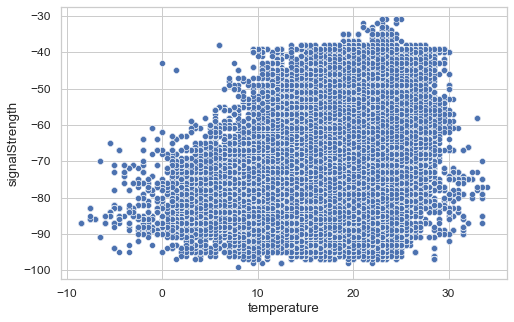

In [12]:
sns.scatterplot(x=events['temperature'], y=events['signalStrength'])

C:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


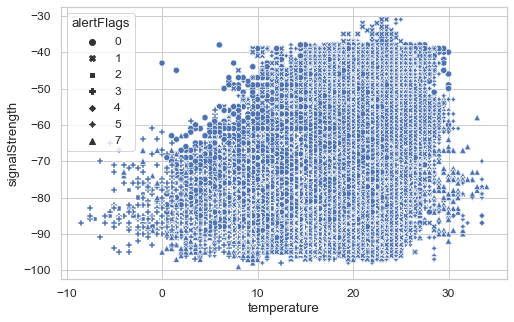

In [13]:
######## Alert-type << -- VS -->> t,signal  (alert type has no connection with temperature )
type = 'scatter'
if type == 'kde':  ### Problem: discrete data falsely spreads into adjacent values 
    sns.kdeplot(data=events, x="signalStrength", y="temperature", hue='alertFlags', fill=True)
elif type == 'scatter':  ### Problem: too many points
    sns.scatterplot(data=events, x="temperature", y="signalStrength", style = 'alertFlags')
plt.show()

C:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


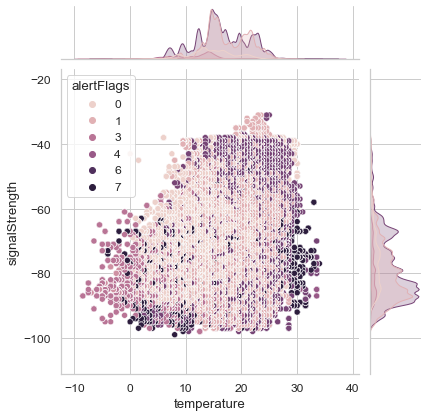

In [14]:
sns.jointplot(data=events, x="temperature", y="signalStrength", hue="alertFlags")

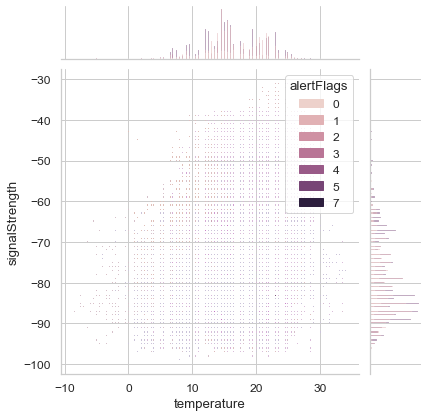

In [15]:
sns.jointplot(data=events, x="temperature", y="signalStrength", hue="alertFlags", kind="hist")

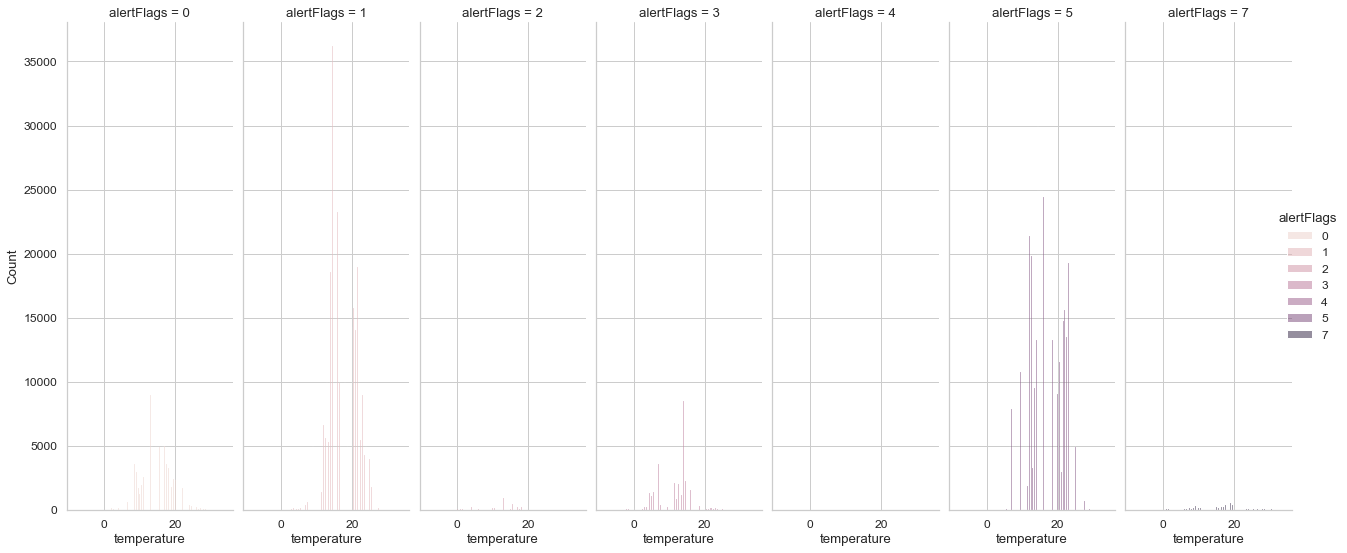

In [16]:
g1= sns.displot(data=events, x="temperature", hue="alertFlags", col="alertFlags")
g1.fig.set_figwidth(18.30)
g1.fig.set_figheight(8.7)

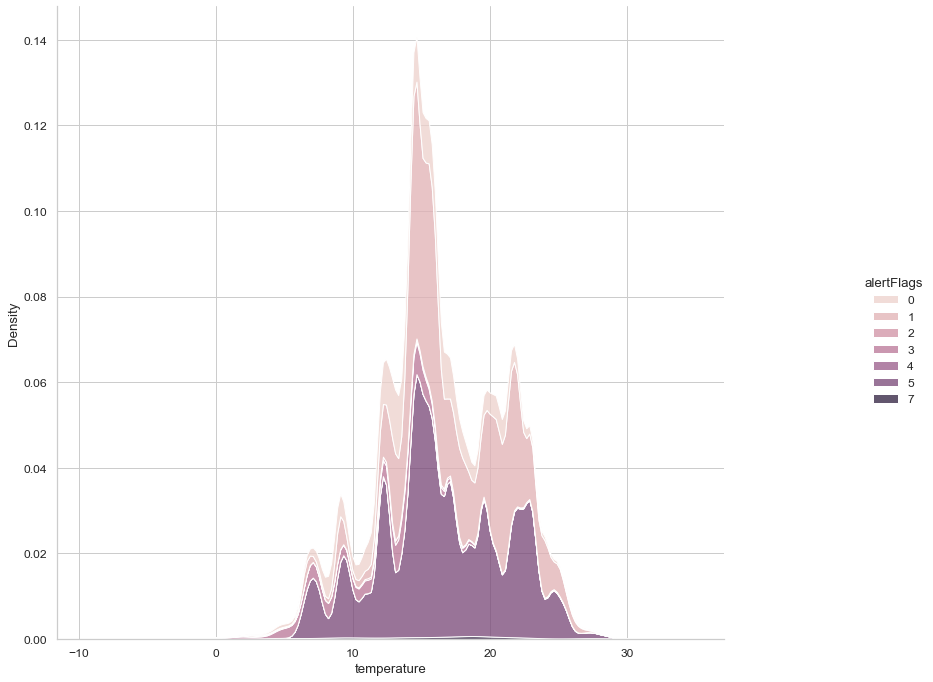

In [17]:
g2 = sns.displot(data=events, x="temperature", hue="alertFlags", multiple="stack", kind="kde")
g2.fig.set_figwidth(14.30)
g2.fig.set_figheight(10.7)

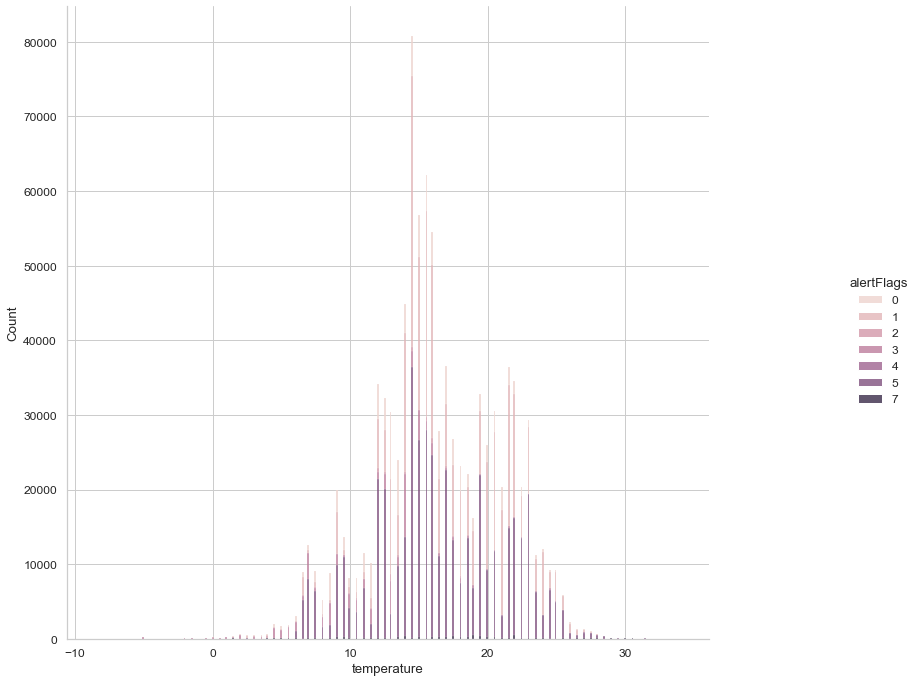

In [18]:
g3 = sns.displot(data=events, x="temperature", hue="alertFlags", multiple="stack")
g3.fig.set_figwidth(14.27)
g3.fig.set_figheight(10.7)

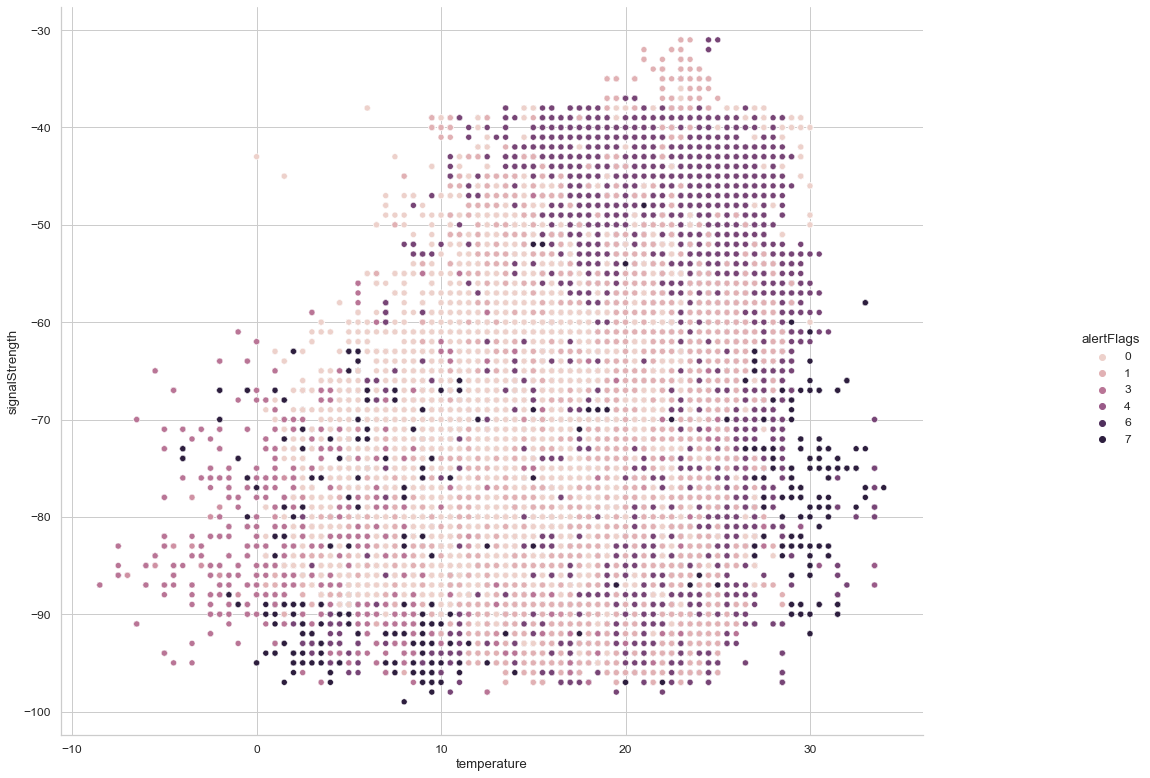

In [19]:
fig = sns.relplot(x="temperature", y="signalStrength", hue="alertFlags", data=events)
fig.fig.set_figheight(12.30)
fig.fig.set_figwidth(18.60)

In [24]:
import datapane as dp
dp.login(token='1256ee1356441d45babcb2a93df818a27f0be427')
dp.ping()
dp.enable_logging()

dp.Report(
   dp.Plot(fig),
   dp.DataTable(events)
).upload(name="Second report", open=True)

Connected successfully to https://datapane.com as adrisoppe
Connected successfully to https://datapane.com as adrisoppe


Configuring datapane logging in library mode
[15:21:55] [DEBUG] Saved object to C:\Users\Adriana\AppData\Local\Temp\dp-tmp-eel0ejz3\dp-tmp-0nmg3qce.pkl (144605655 bytes)


DPError: Can't embed object as a plot
Please run with `dp.enable_logging()`, restart your Jupyter kernel/Python instance, and/or visit https://www.github.com/datapane/datapane to raise issue / discuss if error repeats